Face Detection made easy with Multi-task Cascaded Convolutional Neural Networks(MTCNN) which is an algorithm consisting of 3 stages, which detects the bounding boxes of faces in an image along with their 5 Point Face Landmarks. People's faces can be identified and listed out a list or array(matrix) from a crowd with backgrounds.

In [2]:
# face detection with mtcnn on a photograph
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
from PIL import Image 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    plt.show()

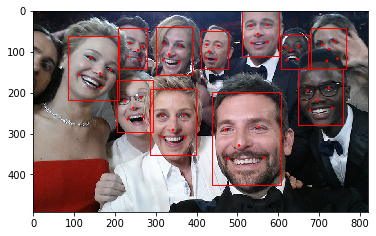

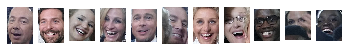

In [3]:
# extract and plot each detected face in a photograph
def draw_faces(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot each face as a subplot
    faces = []
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # define subplot
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        # plot face
        face = data[y1:y2, x1:x2]
        faces.append(face)
        plt.imshow(face)
    # show the plot
    plt.show()
    return faces
 
filename = 'Ellen-DeGeneres-Oscars-selfie-t.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)
# draw each face separately and return a list of extracted images in pixels
extracts = draw_faces(filename, faces)

Face identifications of the celebrities would require developing a very large training dataset, required to train modern-convolutional-neural-network-based face recognition systems. A deep convolutional neural network architecture is used in the VGG style, with blocks of convolutional layers with small kernels and ReLU activations followed by max pooling layers, and the use of fully connected layers in the classifier end of the network. Deep models (ResNet-50 and SENet) trained on VGGFace2 were trained by 3.31 million images of 9131 subjects, with an average of 362.6 images for each subject. Images are downloaded from Google Image Search and have large variations in pose, age, illumination, ethnicity and profession (e.g. actors, athletes, politicians). 

In [4]:
# face detection with a vggface2 model
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

In [5]:
# resize pixels to the model size, required image size for vggface
required_size=(224, 224)
image = Image.fromarray(extracts[4])
image = image.resize(required_size)
face_array = np.asarray(image)
# convert one face into samples
face_array = face_array.astype('float32')
samples = np.expand_dims(face_array, axis=0)
# prepare the face for the model, e.g. center pixels, version =2 means we are using VGGFace2 model
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

b' Brad_Pitt': 97.045%
b' Rob_Lowe': 0.391%
b' Patrik_Antonius': 0.322%
b' Clay_Walker': 0.225%
b' Jack_Layton': 0.179%


The following explore the art of neural network deep learning model combined with principal component analysis technique on anaylyzing the 64X64 pixel face images of 40 people with each person of 10 faces. Basic principle of embedding and encoding and projection is discussed

In [6]:
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC

## Step 1: Read dataset and visualize it.
df = pd.read_csv('face_data.csv')
#print(df.head())
label = df['target']
pixels = df.drop('target', axis=1)
#print(label)
#print(pixels)
pixels.shape
# Because it is 64X64 pixels there are 4096 pixels columns forming the initial dimension of the image problem

(400, 4096)

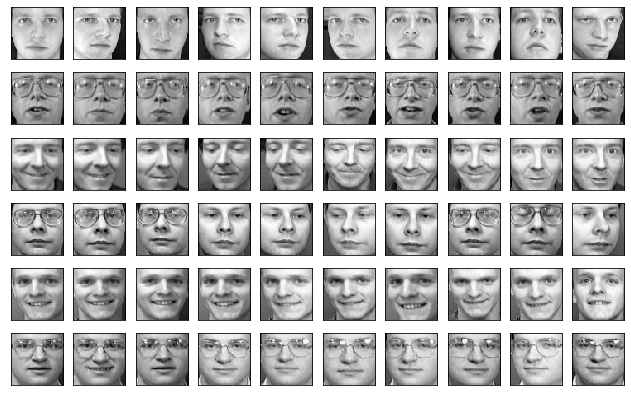

In [7]:
##Helper functions to construct original images from pixels encoding data file. 
def show_original_images(pixels):
    #Displaying Orignal Images
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()
# Review original images from input data file    
show_original_images(pixels)

In [33]:
pixels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4096 entries, 0 to 4095
dtypes: float64(4096)
memory usage: 12.5 MB


In [34]:
pixels.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669422,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


desired goal is to reduce the dimensions of a (d)-dimensional dataset by projecting it onto a (k)-dimensional subspace (where k<d) in order to increase the computational efficiency while retaining most of the information. An important question is "what is the size of k that represents the data 'well'?" Compute eigenvectors (the principal components) of a dataset and collect them in a projection matrix, each of those eigenvectors is associated with an eigenvalue which can be interpreted as the "length" or "magnitude" of the corresponding eigenvector. If some eigenvalues have a significantly larger magnitude than others that the reduction of the dataset via PCA onto a smaller dimensional subspace by dropping the "less informative" eigenpairs is reasonable.

Standard deviation (SD, $σ$ for population standard deviation, or $s$ for sample standard deviation) is a measure that is used to quantify the amount of variation or dispersion from the mean of a set of data values. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are spread out.
Standard deviation is the square root of variance:

$$variance(X) = \frac {\sum{(x_i - \bar{X})^2}} {n-1}$$
$$s(X) = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n-1}}$$
$$Covariance(X,Y) = \frac {\sum{(x_i - \bar{X})(y_i - \bar{Y})}} {n-1}$$
> **Standard deviation** is often used because it is in the same units as the original data! By glancing at the standard deviation, we can immediately estimate how "typical" a data point might be by how many standard deviations it is from the mean. Furthermore, standard deviation is the only value that makes sense to visually draw alongside the original data.
> **Variance** is often used for efficiency in computations. The square root in the SD always increases with the function to which it is applied. So, removing it can simplify calculations (e.g., taking derivatives), particularly if we are using the variance for tasks such as optimization.
> **Covariance** as a measure of how much each of the dimensions vary from the mean with respect to each other.
• Covariance is measured between 2 dimensions to see if there is a relationship between the 2 dimensions e.g. number of hours studied & marks obtained. • The covariance between one dimension and itself is the variance

In [2]:
X_white = (pixels - pixels.mean(axis=0))/pixels.std(axis=0)
C = X_white.T @ X_white / (X_white.shape[0] - 1)
print('Covariance matrix \n%s' %C)

Covariance matrix 
             0         1         2         3         4         5         6  \
0     1.000000  0.943217  0.814868  0.702582  0.609224  0.556316  0.525357   
1     0.943217  1.000000  0.924430  0.804965  0.697400  0.641778  0.604667   
2     0.814868  0.924430  1.000000  0.937977  0.826491  0.757834  0.710661   
3     0.702582  0.804965  0.937977  1.000000  0.937839  0.860794  0.805494   
4     0.609224  0.697400  0.826491  0.937839  1.000000  0.955308  0.891157   
...        ...       ...       ...       ...       ...       ...       ...   
4091 -0.243603 -0.282713 -0.344060 -0.371025 -0.380145 -0.406661 -0.425379   
4092 -0.211231 -0.264153 -0.338443 -0.372524 -0.394614 -0.419366 -0.440186   
4093 -0.185307 -0.251341 -0.333210 -0.383855 -0.408263 -0.427576 -0.450372   
4094 -0.181182 -0.243453 -0.317073 -0.368682 -0.400189 -0.416441 -0.433513   
4095 -0.143213 -0.197476 -0.269769 -0.323276 -0.359229 -0.374039 -0.382900   

             7         8         9  ...     

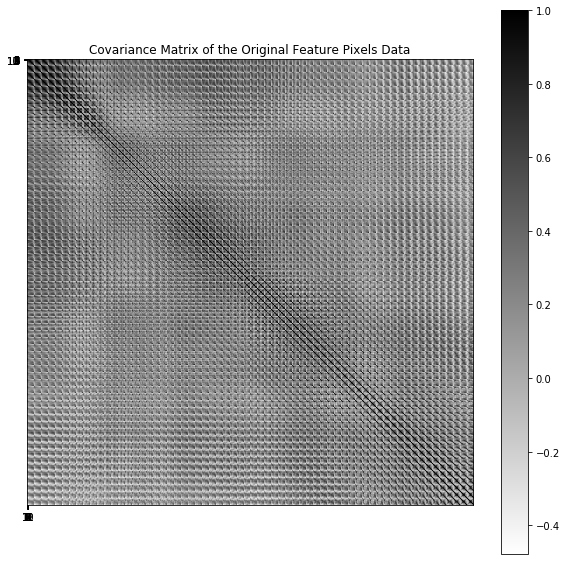

In [38]:
#Plot this covariance matrix, the darker area are the highly correlated features
plt.figure(figsize=(10,10));
plt.imshow(C, cmap='binary');
plt.title("Covariance Matrix of the Original Feature Pixels Data")
plt.xticks(np.arange(0, 13, 1))
plt.yticks(np.arange(0, 13, 1))
plt.colorbar()

In [3]:
# Let us calculate eigenvalues and eigenvectors of above covariance using numpy library linalg
eig_vals_C, eig_vecs_C = np.linalg.eig(C)
eig_vals_C=np.real(eig_vals_C)
eig_vecs_C=np.real(eig_vecs_C)
print('Eigenvectors \n%s' %eig_vecs_C)
print('\nEigenvalues \n%s' %eig_vals_C)

Eigenvectors 
[[ 0.00332091  0.02209019  0.00096616 ...  0.00295112  0.00105851
   0.00169068]
 [ 0.0051638   0.02419231 -0.00080387 ...  0.00036323  0.00029892
   0.00015265]
 [ 0.00662312  0.02679893 -0.00087628 ...  0.00041334  0.00028162
   0.00013216]
 ...
 [-0.00136457 -0.02241647 -0.00844198 ...  0.02283167  0.01151955
  -0.00692353]
 [-0.00355313 -0.02091237 -0.00716255 ... -0.02817641 -0.02045663
   0.00538532]
 [-0.00343196 -0.01938374 -0.00604271 ... -0.00492698 -0.0264437
   0.02555044]]

Eigenvalues 
[ 1.10085933e+03  5.05543736e+02  3.21183971e+02 ... -3.67414464e-16
 -6.49373576e-16  4.99545026e-16]


From above chart we see strong correlations between some of the features(pixels) of the faces. And they are particularly strong around two or three cluster regions (for instance, top left region). Among the eigenvalues we see steep decline in values from largest to the smallest indicating importance of certain orthogonal components.

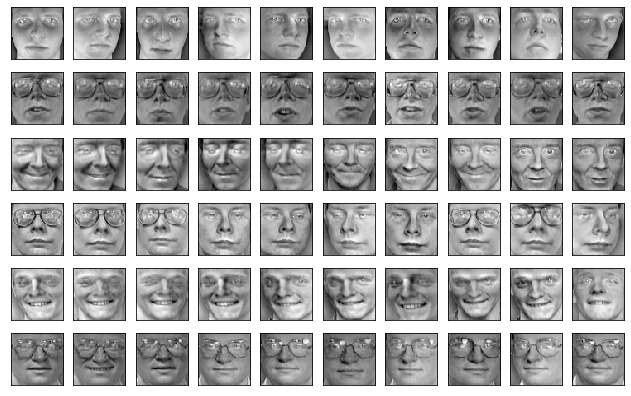

In [8]:
# standardization is the method to move the dataset to the coordinate center and set value boundaries by
# subtracting mean and divided by σ to give zero mean and unit variance dataset
from sklearn.preprocessing import StandardScaler 
pixels_std = StandardScaler().fit_transform(pixels)
# Look at the faces after standardization, although still recogizable, they look more like negatives to me
show_original_images(pixels_std)

In [23]:
# calculate covariance matrix manually again according to its formula, we see slight differences
# from the nonstandardized pixels data 
mean_vec = np.mean(pixels_std, axis=0)
cov_mat = (pixels_std - mean_vec).T.dot((pixels_std - mean_vec)) / (pixels_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00250627  0.94558135  0.81691076 ... -0.18577135 -0.18163618
  -0.14357149]
 [ 0.94558135  1.00250627  0.92674718 ... -0.25197043 -0.24406329
  -0.19797127]
 [ 0.81691076  0.92674718  1.00250627 ... -0.33404481 -0.31786727
  -0.27044509]
 ...
 [-0.18577135 -0.25197043 -0.33404481 ...  1.00250627  0.91379936
   0.82836774]
 [-0.18163618 -0.24406329 -0.31786727 ...  0.91379936  1.00250627
   0.94628591]
 [-0.14357149 -0.19797127 -0.27044509 ...  0.82836774  0.94628591
   1.00250627]]


In [14]:
# calculate covariance matrix by calling numpy covariance function np.cov()
cov_matrix = np.cov(pixels_std.T)
print(cov_matrix.shape)
print(cov_matrix)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals=np.real(eig_vals)
eig_vecs=np.real(eig_vecs)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

(4096, 4096)
[[ 1.00250627  0.94558135  0.81691076 ... -0.18577135 -0.18163618
  -0.14357149]
 [ 0.94558135  1.00250627  0.92674718 ... -0.25197043 -0.24406329
  -0.19797127]
 [ 0.81691076  0.92674718  1.00250627 ... -0.33404481 -0.31786727
  -0.27044509]
 ...
 [-0.18577135 -0.25197043 -0.33404481 ...  1.00250627  0.91379936
   0.82836774]
 [-0.18163618 -0.24406329 -0.31786727 ...  0.91379936  1.00250627
   0.94628591]
 [-0.14357149 -0.19797127 -0.27044509 ...  0.82836774  0.94628591
   1.00250627]]
Eigenvectors 
[[ 0.00332091  0.02209019  0.00096616 ...  0.00244843 -0.00206649
  -0.00259467]
 [ 0.0051638   0.02419231 -0.00080387 ...  0.00026117 -0.0001007
  -0.00031971]
 [ 0.00662312  0.02679893 -0.00087628 ...  0.00027205 -0.0001135
  -0.00039257]
 ...
 [-0.00136457 -0.02241647 -0.00844198 ... -0.00324075 -0.02523474
   0.00636241]
 [-0.00355313 -0.02091237 -0.00716255 ... -0.03043038  0.01813132
   0.03164249]
 [-0.00343196 -0.01938374 -0.00604271 ... -0.00875567  0.02765251
   0.01

From the above covariance calculations we see that manual calculation and numpy function cov() call give identical covariance matrix and so are the corresponding eigenpair compositions. However, standardization of input pixels dataset made a small difference in the results.

In [16]:
# projections of pixels_std on the principal axes(eig_vecs) are called principal components
principal_components = pixels_std.dot(eig_vecs)
print("Y = \n", principal_components)

Y = 
 [[ 4.52683796e+01  2.17394863e+00 -2.18183962e+01 ... -8.21565038e-15
   1.49880108e-15  7.16093851e-15]
 [ 1.18600372e+01  4.19549132e+01  3.10510980e+00 ... -3.98292510e-15
   1.56819002e-15  3.27515792e-15]
 [ 3.92739915e+01  7.27784631e+00 -1.19402003e+01 ...  4.44089210e-16
   1.08940634e-15 -1.44328993e-15]
 ...
 [-1.08121116e+01  9.58496962e+00  2.41949447e+01 ...  7.03950787e-15
  -3.92047506e-15 -8.00748357e-15]
 [ 3.69393155e+01 -5.69633866e+01 -5.20919806e+00 ...  3.69149156e-15
   4.44089210e-15 -4.74620343e-15]
 [ 8.68293550e+00 -1.52902214e+01  9.25133633e+00 ... -5.80091530e-15
   1.30451205e-15  6.88338275e-15]]


In [22]:
# calculate covariance matrix by calling numpy covariance function using nonstandardized pixels
cov_matrix = np.cov(pixels.T)
print(cov_matrix.shape)
print(cov_matrix)

(4096, 4096)
[[ 0.0326506   0.03229796  0.02867434 ... -0.0062897  -0.00601135
  -0.00467442]
 [ 0.03229796  0.03591166  0.03411554 ... -0.0089469  -0.00847119
  -0.0067598 ]
 [ 0.02867434  0.03411554  0.03792458 ... -0.01218907 -0.01133785
  -0.00948972]
 ...
 [-0.0062897  -0.0089469  -0.01218907 ...  0.03528458  0.03143893
   0.02803686]
 [-0.00601135 -0.00847119 -0.01133785 ...  0.03143893  0.03371498
   0.03130744]
 [-0.00467442 -0.0067598  -0.00948972 ...  0.02803686  0.03130744
   0.03262884]]


The cov() and the manual calculation from standardized pixels_std feature matrix generates identical covariance matrix and eigenpairs. However, the cov()function calculates very different covariance matrix by taking in nonstandardized pixels

In [25]:
# calculate covariance matrix by calling numpy correlation function 
corr_matrix = np.corrcoef(pixels_std.T)
print(corr_matrix.shape)
print(corr_matrix)
eig_vals_corr, eig_vecs_corr = np.linalg.eig(corr_matrix)
eig_vals_corr=np.real(eig_vals_corr)
eig_vecs_corr=np.real(eig_vecs_corr)
print('Eigenvectors \n%s' %eig_vecs_corr)
print('\nEigenvalues \n%s' %eig_vals_corr)

(4096, 4096)
[[ 1.          0.9432174   0.81486848 ... -0.18530692 -0.18118209
  -0.14321256]
 [ 0.9432174   1.          0.92443031 ... -0.2513405  -0.24345313
  -0.19747634]
 [ 0.81486848  0.92443031  1.         ... -0.3332097  -0.3170726
  -0.26976897]
 ...
 [-0.18530692 -0.2513405  -0.3332097  ...  1.          0.91151486
   0.82629682]
 [-0.18118209 -0.24345313 -0.3170726  ...  0.91151486  1.
   0.9439202 ]
 [-0.14321256 -0.19747634 -0.26976897 ...  0.82629682  0.9439202
   1.        ]]
Eigenvectors 
[[ 3.32091268e-03  2.20901861e-02  9.66163528e-04 ... -1.32814027e-04
  -4.13099337e-03  1.34118302e-03]
 [ 5.16380141e-03  2.41923141e-02 -8.03866187e-04 ... -8.09612237e-05
  -3.02845209e-04  1.75251980e-04]
 [ 6.62312042e-03  2.67989285e-02 -8.76282491e-04 ... -7.99712282e-05
  -4.90674220e-04  6.08620816e-05]
 ...
 [-1.36456935e-03 -2.24164697e-02 -8.44198371e-03 ...  1.91172670e-02
   2.56363502e-02  2.21726496e-02]
 [-3.55313194e-03 -2.09123739e-02 -7.16254715e-03 ... -2.63295878e

In [24]:
# calculate covariance matrix by calling correlation matrix function nonstandardized pixels data
corr_matrix = np.corrcoef(pixels.T)
print(corr_matrix.shape)
print(corr_matrix)
eig_vals_corr, eig_vecs_corr = np.linalg.eig(corr_matrix)
eig_vals_corr=np.real(eig_vals_corr)
eig_vecs_corr=np.real(eig_vecs_corr)
print('Eigenvectors \n%s' %eig_vecs_corr)
print('\nEigenvalues \n%s' %eig_vals_corr)

(4096, 4096)
[[ 1.          0.9432174   0.81486848 ... -0.18530692 -0.18118209
  -0.14321256]
 [ 0.9432174   1.          0.92443031 ... -0.2513405  -0.24345313
  -0.19747634]
 [ 0.81486848  0.92443031  1.         ... -0.3332097  -0.3170726
  -0.26976897]
 ...
 [-0.18530692 -0.2513405  -0.3332097  ...  1.          0.91151486
   0.82629682]
 [-0.18118209 -0.24345313 -0.3170726  ...  0.91151486  1.
   0.9439202 ]
 [-0.14321256 -0.19747634 -0.26976897 ...  0.82629682  0.9439202
   1.        ]]
Eigenvectors 
[[ 3.32091268e-03  2.20901861e-02  9.66163528e-04 ...  2.15939345e-03
   2.15939345e-03  1.01185655e-03]
 [ 5.16380141e-03  2.41923141e-02 -8.03866187e-04 ...  2.68862945e-04
   2.68862945e-04 -1.77140942e-05]
 [ 6.62312042e-03  2.67989285e-02 -8.76282491e-04 ...  1.98882652e-04
   1.98882652e-04  1.92027650e-04]
 ...
 [-1.36456935e-03 -2.24164697e-02 -8.44198371e-03 ... -2.73302517e-03
  -2.73302517e-03  6.37192802e-03]
 [-3.55313194e-03 -2.09123739e-02 -7.16254715e-03 ... -9.84631538e

From above comparisons we see covariance matrix and correlation matrix are similar but give slightly different covariance matrices. Both could work. We also see that for correlation matrix it does not matter whether we standardize pixels dataset or not the eigenvalues and eigenvectors obtained are essentailly the same. And the correlation matrix calculated matrix is identical to that of the manual covariance calcualtion using nonstandardized pixels feature data set. The eigendecomposition of the covariance matrix (if the input data was standardized) yields the similar results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix. Remember in the first step we manually normalized the input matrix as well which made it identical to the correlation matrix.

In [12]:
# The sklearn is applying pca to the whole pixels feature data set, both standardized and nonstandardized
# We put n_component(principal component number) to be 135 here and will explain why later
pca = PCA(n_components=135)
pca1=pca.fit(pixels)
pca2=pca.fit(pixels_std)
print('Explained Variance = \n', pca1.explained_variance_)
print('Explained Variance = \n', pca2.explained_variance_)
print('Principal Axes \n=', pca1.components_)
print('Principal Axes \n=', pca2.components_)
X_transformed1 = pca1.transform(pixels)
X_transformed2 = pca2.transform(pixels_std)
print('pca1 singular values = \n', pca1.singular_values_.round(4))
print('pca2 singular values = \n', pca2.singular_values_.round(4))
print('pca1 transformed = \n', X_transformed1.round(2))
print('pca2 transformed = \n', X_transformed2.round(2))
#another way to calculate explained_variance or eigenvalues
np.array([(X_transformed2[:, i]**2).sum()/(pixels_std.shape[0]-1) for i in range(135)]).round(2)

Explained Variance = 
 [1103.61837268  506.81076321  321.98894368  192.52604879  133.29820198
  127.32608315   97.88654576   85.07040808   76.28876495   67.59767138
   62.99632725   55.58600284   50.65339264   46.97242494   44.93781648
   39.34572053   35.59951007   32.57948277   31.1792511    29.53297466
   27.66548311   26.72432918   24.40018953   22.7398063    22.05838731
   21.06701822   20.38505388   19.42049762   17.28771335   16.89589362
   16.18486645   15.20429207   14.96804839   13.74425081   13.49528824
   13.09000679   12.65117664   11.94077303   11.69697841   10.9920695
   10.72117246   10.35740961   10.13508195   10.06972088    9.56947724
    9.49308399    9.14254453    9.0481522     8.53353023    8.45599403
    8.31977672    8.01233851    7.80034688    7.59867444    7.38474217
    7.12698496    6.88563548    6.77419563    6.53236059    6.44953419
    6.40206109    6.19125048    6.08927788    5.94531126    5.82707689
    5.72518764    5.67884094    5.45667725    5.4177739

array([1103.62,  506.81,  321.99,  192.53,  133.3 ,  127.33,   97.89,
         85.07,   76.29,   67.6 ,   63.  ,   55.59,   50.65,   46.97,
         44.94,   39.35,   35.6 ,   32.58,   31.18,   29.53,   27.67,
         26.72,   24.4 ,   22.74,   22.06,   21.07,   20.39,   19.42,
         17.29,   16.9 ,   16.18,   15.2 ,   14.97,   13.74,   13.5 ,
         13.09,   12.65,   11.94,   11.7 ,   10.99,   10.72,   10.36,
         10.14,   10.07,    9.57,    9.49,    9.14,    9.05,    8.53,
          8.46,    8.32,    8.01,    7.8 ,    7.6 ,    7.38,    7.13,
          6.89,    6.77,    6.53,    6.45,    6.4 ,    6.19,    6.09,
          5.95,    5.83,    5.73,    5.68,    5.46,    5.42,    5.28,
          5.2 ,    5.18,    4.98,    4.94,    4.75,    4.72,    4.68,
          4.48,    4.4 ,    4.37,    4.32,    4.29,    4.18,    4.03,
          3.98,    3.9 ,    3.87,    3.74,    3.72,    3.7 ,    3.64,
          3.53,    3.49,    3.44,    3.41,    3.34,    3.32,    3.21,
          3.16,    3

From appearance, this eigen value and vectors pair are equivalent for standardized and nostandardized pixels data. This is understandable because the PCA API actually did the normalization whitening inside its modual. The eigenvalues are identical to that obtained by covariance method(with pixels_std) and very close to that obtained by correlation method. But it seems that eigenvectors are not the same as obtained by those above methods. This is because numpy function calculated eigenvector matrix put each corresponding eigenvector as a column, and sklearn PCA API calculates eigenvectors as rows in its matrix. A simple transposed comparisons between the numpy cov(pixels_std) calculated values and PCA values show that they are identical vectors. This demonstrates that PCA in sklearn by default uses numpy cov() function or manual calculation with standardized input data.

In [15]:
eig_v=eig_vecs.T
eig_v=abs(eig_v)

In [16]:
abs(pca1.components_)

array([[0.00332091, 0.0051638 , 0.00662312, ..., 0.00136457, 0.00355313,
        0.00343196],
       [0.02209019, 0.02419231, 0.02679893, ..., 0.02241647, 0.02091237,
        0.01938374],
       [0.00096616, 0.00080387, 0.00087628, ..., 0.00844198, 0.00716255,
        0.00604271],
       ...,
       [0.00731221, 0.0086503 , 0.01592427, ..., 0.0179737 , 0.0167934 ,
        0.00987772],
       [0.00326805, 0.0070318 , 0.00274663, ..., 0.03677788, 0.02836178,
        0.01457457],
       [0.04880273, 0.03028151, 0.02944702, ..., 0.02339001, 0.02316025,
        0.01867856]])

In [17]:
# confirm that the manually calculated and PCA calculated eigenvectors are identical
for i in range(10):
    print(eig_v.round(4)[i] == abs(pca1.components_.round(4)[i]))

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


U Σ (V.T) = A  --- Singular Value Decomposition of matrix A. – In general, if A is m x n, then U will be m x m, Σ will be m x n, and (V.T) will be n x n.
• Where U and V are rotation matrices, and Σ is a scaling matrix, i.e. the number of nonzero entries = rank of A
– The algorithm always sorts the entries high to low
• Each product of (column i of U)·(value i from Σ)·(row i of V.T) produces a component of the final A
• We’re building A as a linear combination of the columns of U
• Using all columns of U, we’ll rebuild the original matrix perfectly
• In real-world data, often we can just use the first few columns of U and we’ll get something close. Singular values Σ (s in the formular below in calculations) shows this clearly where it has biggest first value and then sharp declines.
• We can call those first few columns of U the Principal Components of the data
• They show the major patterns that can be added to produce the columns of the original matrix
• The rows of V.T show how the principal components are mixed to produce the columns of the matrix

In [18]:
# Singular Vector Decomposition (SVD) is more efficient way of doing the eigenvector decomposition
# Direct output from SVD decomposition we get eigenvectors and singular values which must be converted to eigenvalues
u,s,v = np.linalg.svd(pixels.T)
u_std,s_std,v_std = np.linalg.svd(pixels_std.T)
print('Eigenvectors \n%s' %u)
print('\nEigenvectors \n%s' %u_std)
print('\nSingularvalues \n%s' %s)
print('\nSingualrvalues \n%s' %s_std)
print(len(u))
for ev in u:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')
for ev_std in u_std:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev_std))
print('Everything ok!')
# print(v.T)
# print(v_std.T)
# print((u[:, :135]*s[:135]).round(2))
# print((u_std[:, :135]*s_std[:135]).round(2))

Eigenvectors 
[[-1.11938956e-02  2.74250375e-02  3.61406734e-04 ... -1.68994637e-02
  -3.17788685e-03  8.21933744e-03]
 [-1.21833427e-02  3.09140670e-02 -2.41209434e-03 ...  7.42661126e-03
   1.45298393e-03 -1.45896223e-03]
 [-1.33832999e-02  3.45559156e-02 -3.26790282e-03 ... -9.41310808e-03
   7.28309839e-04 -2.58097025e-03]
 ...
 [-8.87095891e-03 -2.63078973e-02 -9.12459949e-03 ...  7.51419862e-01
  -9.67924516e-02 -1.98418898e-02]
 [-8.61543277e-03 -2.29272108e-02 -6.93868422e-03 ... -9.92396359e-02
   7.76462153e-01 -1.18967918e-01]
 [-8.53279130e-03 -2.08090900e-02 -5.49363021e-03 ... -2.18471230e-02
  -1.19574022e-01  7.63262373e-01]]

Eigenvectors 
[[ 3.32091268e-03  2.20901861e-02  9.66163528e-04 ... -1.97576746e-02
  -1.43532896e-02 -3.96523947e-03]
 [ 5.16380141e-03  2.41923141e-02 -8.03866187e-04 ...  9.08045150e-03
   6.69315545e-03  6.13192213e-03]
 [ 6.62312042e-03  2.67989285e-02 -8.76282491e-04 ...  7.01836350e-04
   7.58752686e-03  2.68985108e-03]
 ...
 [-1.36456935e-

Everything ok!
Everything ok!


In [62]:
# calculate eigenvalues from singular values calculated from SVD method and matches all eigenvalue calculated
# from all methods above using pixels_std dataset also equal to pca calculated explained_variance
eig_vals_svd = (s_std**2/(pixels_std.shape[0]-1)).round(2)
eig_vals_svd[:10]

array([1103.62,  506.81,  321.99,  192.53,  133.3 ,  127.33,   97.89,
         85.07,   76.29,   67.6 ])

In [20]:
#alternaate method calculating eigenvalues from SVD method which generates identical eigenvalues to other methods
total_var = (pixels_std**2).sum()/(pixels_std.shape[0]-1)
vs = []
for i in range(135):
    Xi = u_std[:,i].reshape(-1, 1)*s_std[i]@v_std[i].reshape(1, -1)
    var_i = (Xi**2).sum()/(pixels_std.shape[0]-1)
    vs.append(var_i)
np.array(vs).round(2)

array([1103.62,  506.81,  321.99,  192.53,  133.3 ,  127.33,   97.89,
         85.07,   76.29,   67.6 ,   63.  ,   55.59,   50.65,   46.97,
         44.94,   39.35,   35.6 ,   32.58,   31.18,   29.53,   27.67,
         26.72,   24.4 ,   22.74,   22.06,   21.07,   20.39,   19.42,
         17.29,   16.9 ,   16.18,   15.2 ,   14.97,   13.74,   13.5 ,
         13.09,   12.65,   11.94,   11.7 ,   10.99,   10.72,   10.36,
         10.14,   10.07,    9.57,    9.49,    9.14,    9.05,    8.53,
          8.46,    8.32,    8.01,    7.8 ,    7.6 ,    7.38,    7.13,
          6.89,    6.77,    6.53,    6.45,    6.4 ,    6.19,    6.09,
          5.95,    5.83,    5.73,    5.68,    5.46,    5.42,    5.28,
          5.2 ,    5.18,    4.98,    4.94,    4.75,    4.72,    4.68,
          4.48,    4.4 ,    4.37,    4.32,    4.29,    4.18,    4.03,
          3.98,    3.9 ,    3.87,    3.74,    3.72,    3.7 ,    3.64,
          3.53,    3.49,    3.44,    3.41,    3.35,    3.32,    3.22,
          3.16,    3

In [22]:
# Truncated SVD method is more simplied way to decompose our input pixels data. Once important observation is that
# the transformed matrix from PCA and Truncated SVD and our manually transformed principal components are identical when 
# the pixels_std standardized input was used. This proves that we can indeed use all of these methods.
svd_tr = TruncatedSVD(n_components=135)
svd_tr.fit(pixels)
print('truncated SVD singular values = \n', svd_tr.singular_values_.round(4))
svd_tr.fit(pixels_std)
print('truncated SVD singular values = \n', svd_tr.singular_values_.round(4))
print('truncated SVD transformed matrix = \n', svd_tr.transform(pixels).round(2))
print('truncated SVD transformed matrix = \n', svd_tr.transform(pixels_std).round(2))

truncated SVD singular values = 
 [717.2214  67.4545  50.5113  40.1835  36.338   31.5873  28.2616  25.8835
  25.2824  22.9766  22.5701  21.3706  19.8919  19.6437  18.4131  17.7287
  17.2356  16.6058  15.4819  15.3724  15.0072  13.9566  13.7481  13.5436
  13.1312  12.9703  12.738   12.5215  12.0877  11.8252  11.3368  11.1047
  10.8092  10.3136  10.2562   9.9885   9.9055   9.7312   9.4377   9.3009
   9.1137   8.9572   8.8714   8.7631   8.701    8.5327   8.4383   8.3752
   8.1827   8.0517   7.9028   7.8062   7.7128   7.5915   7.4938   7.4362
   7.3523   7.2365   7.1596   7.0901   7.0418   6.935    6.9169   6.8346
   6.731    6.6636   6.5786   6.5148   6.4865   6.3765   6.3501   6.3229
   6.2525   6.1956   6.1018   6.0232   6.0199   5.9169   5.891    5.8703
   5.8033   5.753    5.7355   5.6005   5.5601   5.5172   5.5041   5.4474
   5.4216   5.3619   5.3336   5.2979   5.2603   5.2501   5.164    5.0531
   5.0184   5.0081   5.0047   4.9489   4.934    4.8854   4.8621   4.8299
   4.7757   4.736

for SVD method though, the standarzation made a difference and eigenvectors and eigenvalues obtained are different. The standardized pixels dataset applied to np.linalg.svd(pixels_std.T), and TruncatedSVD(n_components=135) and pca.singular_values_ function all generates same singular values. The eigenvectors matrix of standardized pixels_std for pca and svd are same as well. Transformed matrix based on 135 principal components match between pca and svd methods. So SVD gives us the whole nine-yard of diagonalizing a matrix into special matrices that are easy to manipulate and to analyze. It lay down the foundation to untangle data into independent components. PCA skips less significant components. Obviously, we can use SVD to find PCA by truncating the less important basis vectors in the original SVD matrix.

In [16]:
# Sorting based on the eigenvalues are essential but most of the above methods already did that, this is how I manually do
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs[0:4])
# Sort the (eigenvalue, eigenvector) tuples from high to low
idx = eig_vals.argsort()[::-1]   
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
# print('Eigenvalues in descending order:')
eig_vals

[(1103.6183726830704, array([ 0.00332091,  0.0051638 ,  0.00662312, ..., -0.00136457,
       -0.00355313, -0.00343196])), (506.81076321038233, array([ 0.02209019,  0.02419231,  0.02679893, ..., -0.02241647,
       -0.02091237, -0.01938374])), (321.98894367518596, array([ 0.00096616, -0.00080387, -0.00087628, ..., -0.00844198,
       -0.00716255, -0.00604271])), (192.5260487893192, array([ 0.00120392, -0.00036697, -0.00726137, ...,  0.01528009,
        0.01471586,  0.01357052]))]


array([ 1.10361837e+03,  5.06810763e+02,  3.21988944e+02, ...,
       -2.60791377e-14, -3.98471439e-14, -4.41242688e-14])

In [45]:
# compare eigenvalue percentage as ratio of totals from pca, and svd methods
(
    pca2.explained_variance_ratio_.round(2), 
    np.array([pca2.explained_variance_[i]/pca2.explained_variance_.sum() for i in range(135)]).round(2),
    np.array([s_std[i]**2 / sum(s_std**2) for i in range(135)]).round(2)
)

(array([0.27, 0.12, 0.08, 0.05, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ]),
 array([0.28, 0.13, 0.08, 0.05, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.

[26.876 12.342  7.841 ... -0.    -0.    -0.   ]


Text(0, 0.5, 'Explained variance in percent')

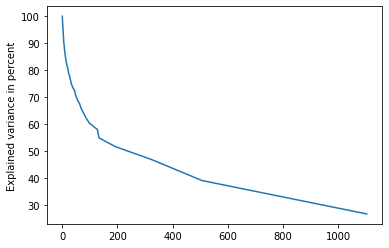

In [19]:
#The explained variance tells us how much information (variance) can be attributed to each of the principal components.
# calculate total of all eigenvalues
tot = sum(eig_vals)
# calculate each Principal Component's value as percent of the tatal 
var_exp = np.array([(i / tot)*100 for i in eig_vals]).round(3)
print(var_exp)
# cumulative sum of each PC's percentage 
cum_var_exp = np.cumsum(var_exp)
len(var_exp)
cum_var_exp
plt.plot(eig_vals,cum_var_exp)
plt.ylabel('Explained variance in percent')

The above chart on cumulative sum against sorted eigenvalues indicates that only for eigenvalues with high numbers contibute to the total significantly. For cumulative total percentage up to above 95%, eigenvalues span across from 1100 down to 1 with only a few eigenvalues, which is very fast decay in contributions. Therefore significant parities of 'principal eigenvalues'.
Next, construction of the projection matrix using only the principal components to transform the input data onto the new feature subspace. Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors. I am reducing the 4096-dimensional feature space to a 135-dimensional feature subspace, by choosing the "top 135" eigenvectors with the top 135 eigenvalues to construct our 400×135-dimensional eigenvector matrix W.

In [20]:
# Concatenate eigenvectors into projection matrix_w. This is a demo on manual pca transform how it works
matrix_w = eig_pairs[0][1].reshape(4096,1)
for i in range(1,135):
    matrix_w = np.hstack((matrix_w, eig_pairs[i][1].reshape(4096,1)))
    
print('Matrix W:\n', matrix_w[:10])
matrix_w.shape

Matrix W:
 [[ 0.00332091  0.02209019  0.00096616 ...  0.03189202  0.0213994
  -0.02087446]
 [ 0.0051638   0.02419231 -0.00080387 ...  0.022686    0.02982526
   0.00697   ]
 [ 0.00662312  0.02679893 -0.00087628 ...  0.00792201  0.02923448
  -0.00912903]
 ...
 [ 0.01234648  0.02797188  0.00598073 ... -0.00116976  0.00298992
   0.00263901]
 [ 0.01353832  0.02648805  0.00830031 ...  0.00116929 -0.00120656
   0.01340087]
 [ 0.0146374   0.02442577  0.00988977 ... -0.00466301 -0.00959831
   0.01184389]]


(4096, 135)

Compare this matrix W with previously calculated eigenvector matrix from PCA and SVD confirms they are eseentailly same matrix.
The 4096×135-dimensional projection matrix_W transforms our samples data pixels onto the new subspace via the equation
Y=X×W, where Y is a 400×135 matrix of our transformed samples.

In [21]:
# We now projecting the orignal pixels face data set into our pricipal component subspace and realize these are
# identical to the SVD, PCA,Truncated SVD transformed matrices using the original nonstandardized pixels matrix
Y = np.dot(pixels,matrix_w)
Y[:10]
Y.shape
print(Y[0,:])
Y[0,:].shape

[ 4.00752315e+01  5.78310973e+00 -3.24333425e+00  2.00093790e+00
 -2.55077976e+00 -3.46161545e+00  1.81553228e+00  1.88571916e+00
  3.37042447e+00  1.83708132e+00 -1.35067459e+00  5.41235429e-01
  2.36451739e+00 -8.83609944e-01  7.71549282e-01  1.25942040e+00
 -2.25097182e+00  9.23729650e-01  4.91522333e-01  1.07635256e+00
  7.33173609e-01  1.54147038e-01  1.61070282e+00  2.78808126e-01
  6.75262299e-01 -1.83188549e-01  3.50326860e-01  4.35630944e-02
 -5.54864539e-01  1.01582603e+00 -1.07764193e-01 -7.00842512e-01
  4.66756756e-01  7.75877617e-01 -1.62169123e+00  5.02471497e-01
 -1.08060493e-01 -8.05674086e-01  3.84613424e-01 -3.17897227e-01
  8.95778245e-01  6.45821936e-01 -6.68233373e-01 -7.79611993e-01
 -4.71681284e-01 -1.86063016e-01 -3.75920459e-01 -1.88878056e-01
 -3.95699459e-01  3.29880750e-01 -4.67320310e-01  3.36130190e-01
 -3.48845888e-01 -8.42880535e-01 -3.23157851e-01  1.62715544e+00
 -7.76960724e-01 -3.87436211e-01  1.68459691e-01 -1.20733792e-03
  2.91816816e-01  2.88334

(135,)

• Often, raw data samples have a lot of redundancy and patterns
• PCA can allow you to represent data samples as weights on the principal components, rather than using the original raw form of the data
• By representing each sample as just those weights, you can represent just the “meat” of what’s different between samples.
• This minimal representation makes machine learning and other algorithms much more efficient

Text(0, 0.5, 'Projected values for face 2')

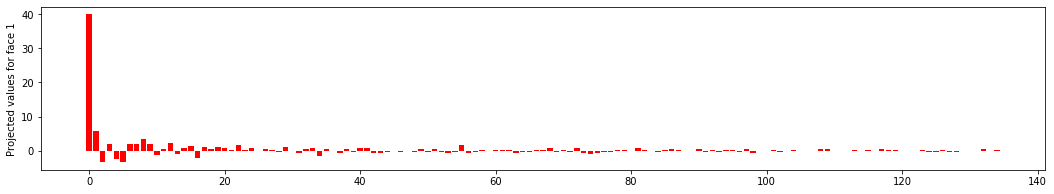

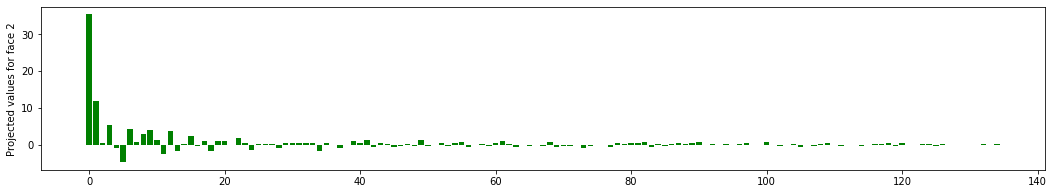

In [22]:
# We are projecting first face into our reduced PC space and look at its characteristics. This is signiture (finger print) of each face
# x-axis is the 135 principal components far left being the largest eigenvalue, y-axis are values of projection on each PC
xs = np.arange(len(Y[0,:])) 
width = 1
plt.figure(figsize=(18,3)); 
plt.bar(xs, Y[0,:], color='r')
plt.ylabel('Projected values for face 1')
plt.figure(figsize=(18,3)); 
plt.bar(xs, Y[1,:], color='g')
plt.ylabel('Projected values for face 2')

This projected face onto principal components and create signitures of faces on orthogonal eigenspace is key concept of face recognition

In [23]:
## Step 2: Split Dataset into training and testing
#First of all, let's split our data into training & test part. There's train_test_split from sci-kit learn.
train_data, val_data, train_target, val_target = train_test_split(pixels, label, random_state=123)
train_data.shape, val_data.shape, len(train_target), len(val_target)

((300, 4096), (100, 4096), 300, 100)

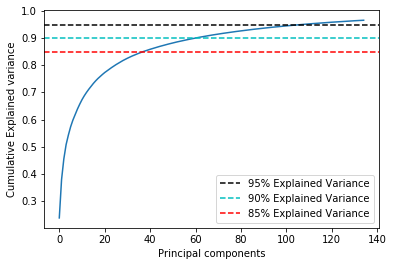

In [27]:
## Step 3: Perform PCA against the train data set.
pca = PCA(n_components=135).fit(train_data)
# calculate pc_80 as comparison on how much fiedelity retained
pc_30 = PCA(n_components=30).fit(train_data)
# There is an easy way to explained variance ratio curve from PCA library
# Once again after 135 eigenvalue, the ratio is over 0.95
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y = .95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = .90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = .85, color='r', linestyle='--', label = '85% Explained Variance')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

The above chart on cumulative sum against indexes in eigenvalue list indicates that fast decay approaching or after 100 value which means that we can choose the highest top 135 eigenvalues and their corresponding eigenvectors and still be able to represent most of the featires the whole dataset would represent. 

In [24]:
# Find the optimal number of PCA's by giving a criteria of how much cumulative features has been retained 
# it takes only 107 principal components to give cumulative 95% total variance ratio. 135 would give even higher perhaps 96%
ratios = pca.explained_variance_ratio_
# iterate through all Principal components
for i in range(np.cumsum(ratios).shape[0]):
    if np.cumsum(ratios)[i] >= 0.95:
        num_pca = i + 1
        print("The optimal number of PCA's is: {}".format(num_pca))
        break
    else:
        continue

The optimal number of PCA's is: 123


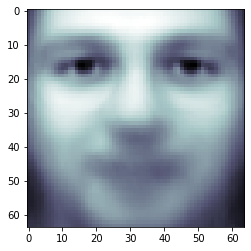

In [17]:
#PCA computes mean face for the whole training set
plt.imshow(pca.mean_.reshape(64, 64), cmap=plt.cm.bone)

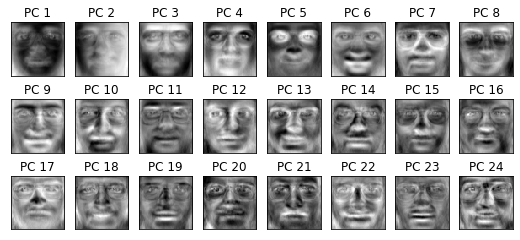

In [25]:
def show_eigenfaces(pca):
    #Displaying Eigenfaces or reshaped eigenvector matrice from largest PC down to smaller PCs
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()
show_eigenfaces(pca)

The first several components seems to show the degree of lighting shadows on faces. Later components then seems to focus on particular locations of a face, such as noise, eyebrows, glasses, mouths, mustaches, etc. The importance of the principal components follows this sequence as PC1 is the predominately important component.

In [28]:
## Step 4: Project Training data to PCA
train_data_pca = pca.transform(train_data)
train_data_pc_30 = pc_30.transform(train_data)
# The dimension of PCA train data set reduced data from 4096 cols down to 135 cols
print(train_data_pca.shape)
val_data_pca = pca.transform(val_data)
# The dimension of PCA test data set reduced data from 4096 cols down to 135 cols
print(val_data_pca.shape)

(300, 135)
(100, 135)


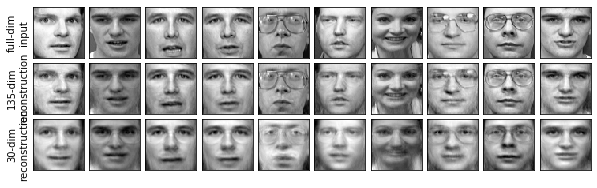

In [29]:
# Compute the components and projected faces on the train data set
projected = pca.inverse_transform(train_data_pca)
project_30 = pc_30.inverse_transform(train_data_pc_30)
# Plot the results comparisons on the train data set
fig, ax = plt.subplots(3, 10, figsize=(10, 3),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(np.array(train_data)[i].reshape(64, 64), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(64, 64), cmap='binary_r')
    ax[2, i].imshow(project_30[i].reshape(64, 64), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('135-dim\nreconstruction');
ax[2, 0].set_ylabel('30-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 135 of the 4096 initial features of the Train_data. This visualization makes clear why the PCA feature selection used here was so successful: although it reduces the dimensionality of the train_data by nearly a factor of 30, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 135-dimensional data rather than 4096-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification. Go down this way further, even choosing PC=30 will not alter the re-projected image very much since the total of the top 30 principal components have close to 83% of the total cumulative eigenvalues. This sequence demonstrates so called "Image Compression" principles in order to save storage space keeping essential features.

From this step down I am going to explore some classification techniques for face recognition. Primarily I am interested in neuro network deep learning technique by tensorflow. Although I will try some other classification techniques. 

In [21]:
## Step 5: Initialize Classifer and fit training data, we are using support vector classification technique here
clf = SVC(kernel='rbf', C=1000, gamma=0.01)
clf = clf.fit(train_data_pca, train_target)

In [22]:
## Step 6: Perform testing and get classification report
val_data_pca = pca.transform(val_data)

In [23]:
pre_target = clf.predict(val_data_pca)
print(pre_target[:10])
print(classification_report(val_target, pre_target))

[29 29 30 15 20 30  5 28 37  9]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       0.75      0.75      0.75         4
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         1
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00      

C:\Users\13305\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Starting Keras is a high-level neural networks API, written in Python, and can run on top of TensorFlow,
# keras for deep learning model creation

from keras.models import Model
from keras.layers import Input, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import plot_model

# one hot encode outputs to turn labels into encoded 40 cols which is norm for NN methods
y_train = to_categorical(train_target)
y_test = to_categorical(val_target)

count_classes = y_test.shape[1]
print(count_classes)

#input_layer use all 135 columns 135 nodes
input_layer = Input(shape=(train_data_pca.shape[1],),name='input_layer')
#The activation function used is a rectified linear unit, or ReLU. 
#ReLU is the most widely used activation function because it is nonlinear, and y=x when x>=0 and y=0 when x<0 
#and has the ability to not activate all the neurons at the same time.
hidden_layer_1 = Dense(32, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(16, activation = 'relu')(hidden_layer_1)
# The output layer with 40 nodes because there are 40 output classes, 0 and 1. 
# Use 'softmax' as the activation function for the output layer, 
# so that the sum of the predicted values from all the neurons in the output layer adds up to one.
output_layer = Dense(40, activation='softmax')(hidden_layer_2)
# custom loss function defined 
# def basic_loss_function(y_true, y_pred):
#     return tf.math.reduce_mean(tf.abs(y_true - y_pred))

model = Model(input=input_layer, output=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

40
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 135)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4352      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 40)                680       
Total params: 5,560
Trainable params: 5,560
Non-trainable params: 0
_________________________________________________________________


C:\Users\13305\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


There are total 5560 parameters in our model which we will tune while back-propagation

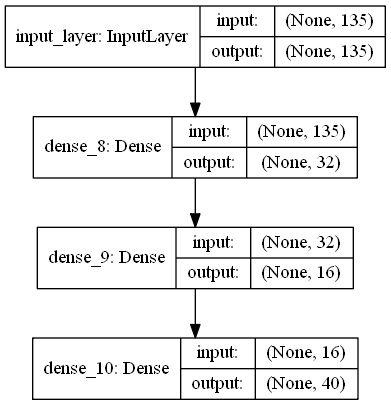

In [31]:
plot_model(model, show_shapes=True)

In [40]:
# We will give training 10 times with the same data.
EPOCHS = 40

# We will process 64 rows at a time.
BATCH_SIZE = 64

model.fit(
        train_data_pca, y_train,
        nb_epoch=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(val_data_pca, y_test))

Train on 300 samples, validate on 100 samples
Epoch 1/40
300/300 [==============================] - 0s 47us/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.5340 - val_accuracy: 0.8100
Epoch 2/40
300/300 [==============================] - 0s 43us/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.5318 - val_accuracy: 0.8100
Epoch 3/40
300/300 [==============================] - 0s 43us/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.5299 - val_accuracy: 0.8100
Epoch 4/40
300/300 [==============================] - 0s 40us/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.5281 - val_accuracy: 0.8100
Epoch 5/40
300/300 [==============================] - 0s 47us/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.5264 - val_accuracy: 0.8100
Epoch 6/40
300/300 [==============================] - 0s 47us/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.5251 - val_accuracy: 0.8100
Epoch 7/40
300/300 [==============================] - 0s 53us/step - loss: 0.0194 - accuracy: 1.

C:\Users\13305\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 12/40
300/300 [==============================] - 0s 37us/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.5162 - val_accuracy: 0.8100
Epoch 13/40
300/300 [==============================] - 0s 50us/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.5148 - val_accuracy: 0.8100
Epoch 14/40
300/300 [==============================] - 0s 60us/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.5135 - val_accuracy: 0.8100
Epoch 15/40
300/300 [==============================] - 0s 60us/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.5119 - val_accuracy: 0.8100
Epoch 16/40
300/300 [==============================] - 0s 53us/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.5107 - val_accuracy: 0.8100
Epoch 17/40
300/300 [==============================] - 0s 43us/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.5096 - val_accuracy: 0.8100
Epoch 18/40
300/300 [==============================] - 0s 37us/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.5084 - val_accuracy:

In [35]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on train and test data')
results_train = model.evaluate(train_data_pca, y_train, verbose=0)
print('train loss, train acc:', results_train)
results_test = model.evaluate(val_data_pca, y_test, verbose=0)
print('test loss, test acc:', results_test)


# Evaluate on train and test data
train loss, train acc: [0.02230480710665385, 1.0]
test loss, test acc: [0.5356036114692688, 0.8100000023841858]


In [36]:
# Predict labels on Validation data which model have never seen before.

val_predictions = model.predict(val_data_pca)
val_predictions.shape

(100, 40)

In [37]:
# first 10 values of validation_predictions
val_predictions[90,:]

array([2.8156641e-05, 5.8574358e-08, 2.3750788e-08, 1.3078006e-03,
       7.5711881e-07, 3.2789733e-09, 8.7015533e-09, 5.0839939e-04,
       9.3166967e-04, 5.2150754e-06, 3.4403843e-07, 1.2442500e-04,
       1.8125861e-04, 2.6925942e-05, 7.2260045e-06, 3.9577702e-05,
       2.4892346e-04, 1.6158215e-04, 7.4772885e-07, 6.0026409e-06,
       3.8324375e-04, 8.7090105e-01, 9.0932275e-07, 2.8923253e-04,
       1.0009436e-03, 5.6369809e-06, 1.0131316e-05, 1.2617673e-05,
       1.3015577e-02, 4.6738945e-02, 2.2627486e-02, 1.2995866e-06,
       2.3033463e-03, 1.3519017e-02, 2.6966045e-03, 1.7072542e-03,
       3.8490174e-03, 2.1976681e-04, 1.6488912e-02, 6.4977817e-04],
      dtype=float32)

In [38]:
#We can see our predictions are in float.Let's convert them into binary integers.
for i in range(y_test.shape[0]):
    for j in range(y_test.shape[1]):
        if val_predictions[i,j] == max(list(val_predictions[i])):
            val_predictions[i, j] = 1 
        else:
            val_predictions[i, j] = 0
val_predictions[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
# Calculate the accuracy score on validation data.
# We already have correct target information for them.
print(classification_report(y_test, val_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.50      0.67         4
           4       0.50      0.33      0.40         3
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         0
           7       1.00      0.67      0.80         3
           8       0.33      1.00      0.50         1
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         0
          14       1.00      1.00      1.00         1
          15       0.40      0.67      0.50         3
          16       1.00      0.50      0.67         2
          17       0.83    

C:\Users\13305\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13305\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train and evaluate a convolutional neural network for image classiﬁcation directly. The Face classiﬁcation problem is a standard dataset used in computer vision and deep learning. It is a dataset comprised of 400 64×64 pixel grayscale images of items of 40 people each with 10 pictures . The train-split classifications below uses the dataset scaled pixel values, then ﬁts a convolutional neural network on the training dataset and evaluates the performance of the network on the test dataset directly without PCA or SVD preprocessings. The example will run in just a few minutes on a modern CPU; no GPU is required.

In [41]:
# fit a deep learning cnn on the face dataset to obtain high classification accuracy
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D 
from keras.layers import Dense 
from keras.layers import Flatten 

#First of all, let's split our data into training & test part. There's train_test_split from sci-kit learn.
trainX, testX, trainY, testY = train_test_split(pixels_std, label, random_state=123)
print(trainX.shape, testX.shape, len(trainY), len(testY))
# reshape dataset to have a single channel 
trainX = np.array(trainX).reshape((trainX.shape[0], 64, 64, 1)) 
#print(trainX[0])
testX = np.array(testX).reshape((testX.shape[0], 64, 64, 1))

# one hot encode target values 
trainY, testY = to_categorical(trainY), to_categorical(testY) 

# define model 
model = Sequential() 
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(64, 64, 1))) 
model.add(MaxPooling2D()) 
model.add(Flatten()) 
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(40, activation='softmax')) 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 
# fit model 
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2) 
# evaluate model
loss, acc = model.evaluate(testX, testY, verbose=0)
print(loss,acc)

(300, 4096) (100, 4096) 300 100
Epoch 1/10
 - 1s - loss: 8.5370 - accuracy: 0.1400
Epoch 2/10
 - 1s - loss: 2.3507 - accuracy: 0.3700
Epoch 3/10
 - 1s - loss: 1.7262 - accuracy: 0.5433
Epoch 4/10
 - 1s - loss: 1.1020 - accuracy: 0.6900
Epoch 5/10
 - 1s - loss: 0.5893 - accuracy: 0.8133
Epoch 6/10
 - 1s - loss: 0.3093 - accuracy: 0.9233
Epoch 7/10
 - 1s - loss: 0.2097 - accuracy: 0.9433
Epoch 8/10
 - 1s - loss: 0.1184 - accuracy: 0.9767
Epoch 9/10
 - 1s - loss: 0.0856 - accuracy: 0.9833
Epoch 10/10
 - 1s - loss: 0.0692 - accuracy: 0.9867
0.8860710287094116 0.8100000023841858


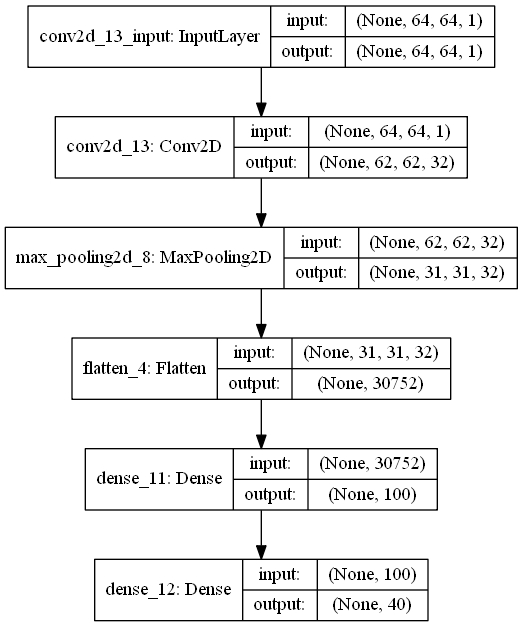

In [42]:
plot_model(model, show_shapes=True)